In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'spring', 'data').Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = tools.get_dataframe('pimkpks', 'spring', 'data').Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

In [4]:
hists_pip = []
hists_pim = []
for e in constants.ALLOWED_E_BINS:
    cut = f'e_beam > {e-0.5} && e_beam < {e+0.5}'
    df_pipkmks_cut = df_pipkmks.Filter(cut)
    df_pimkpks_cut = df_pimkpks.Filter(cut)
    binned_e_hists_pip = []
    binned_e_hists_pim = []
    for t in constants.ALLOWED_T_BINS:
        title = 'M(KK#pi) for E_{#gamma} = ' + str(e) + f' GeV & {constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}' + 'GeV^{2}' 
        binned_e_hists_pip.append(df_pipkmks_cut.Filter(f't_bin == {t}').Histo1D((f'pipkmks_{e}_{t}', title, 60, 1.1, 1.7), 'pipkmks_m'))
        binned_e_hists_pim.append(df_pimkpks_cut.Filter(f't_bin == {t}').Histo1D((f'pimkpks_{e}_{t}', title, 60, 1.1, 1.7), 'pimkpks_m'))
    hists_pip.append(binned_e_hists_pip)
    hists_pim.append(binned_e_hists_pim)
    

In [5]:
print(len(hists_pip[0]))

7


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file kkpi_vs_e_and_t.pdf has been created
Info in <TCanvas::Print>: Current canvas added to pdf file kkpi_vs_e_and_t.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file kkpi_vs_e_and_t.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file kkpi_vs_e_and_t.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file kkpi_vs_e_and_t.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file kkpi_vs_e_and_t.pdf
Info in <TCanvas::Print>: pdf file kkpi_vs_e_and_t.pdf has been closed


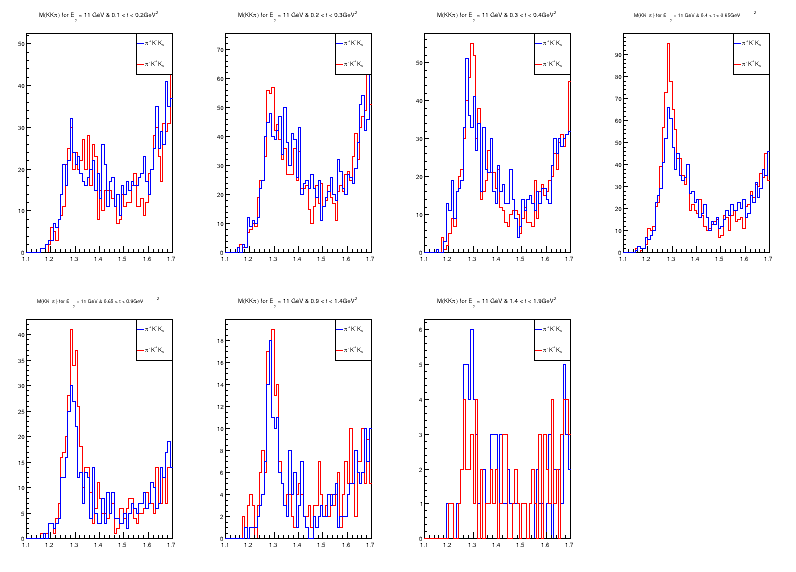

In [13]:
c = ROOT.TCanvas('c', 'c', 800, 600)
c.Divide(4, 2)
legends = []
c.Print('kkpi_vs_e_and_t.pdf[')
for hist_array_pip, hist_array_pim in zip(hists_pip, hists_pim):
    for i, (hist_pip, hist_pim) in enumerate(zip(hist_array_pip, hist_array_pim)):
        c.cd(i+1)
        hist_pim.SetLineColor(ROOT.kRed)
        hist_pip.SetLineColor(ROOT.kBlue)
        sorted_hists = tools.sort_hists_by_max([hist_pip.GetPtr(), hist_pim.GetPtr()])
        sorted_hists[0].Draw()
        sorted_hists[1].Draw('SAME')
        legend = ROOT.TLegend(0.7, 0.75, 0.9, 0.9)
        legend.AddEntry(hist_pip.GetPtr(), '#pi^{+}K^{-}K_{s}', 'l')
        legend.AddEntry(hist_pim.GetPtr(), '#pi^{-}K^{+}K_{s}', 'l')
        legends.append(legend)
        legends[i].Draw()
        c.Update()
    c.Draw()
    c.Print('kkpi_vs_e_and_t.pdf')
c.Print('kkpi_vs_e_and_t.pdf]')

In [14]:
binned_t_hists_pip = []
binned_t_hists_pim = []
for t in constants.ALLOWED_T_BINS:
    title = 'M(KK#pi) for ' + f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}' + 'GeV^{2}' 
    binned_t_hists_pip.append(df_pipkmks.Filter(f't_bin == {t}').Histo1D((f'pipkmks_{t}', title, 60, 1.1, 1.7), 'pipkmks_m'))
    binned_t_hists_pim.append(df_pimkpks.Filter(f't_bin == {t}').Histo1D((f'pimkpks_{t}', title, 60, 1.1, 1.7), 'pimkpks_m'))


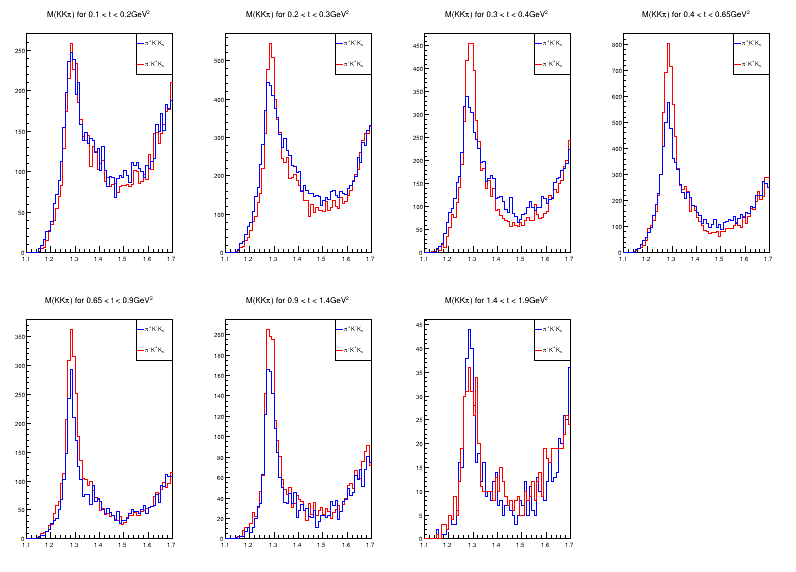

In [15]:
for i, (hist_pip, hist_pim) in enumerate(zip(binned_t_hists_pip, binned_t_hists_pim)):
    c.cd(i+1)
    hist_pim.SetLineColor(ROOT.kRed)
    hist_pip.SetLineColor(ROOT.kBlue)
    sorted_hists = tools.sort_hists_by_max([hist_pip.GetPtr(), hist_pim.GetPtr()])
    sorted_hists[0].Draw()
    sorted_hists[1].Draw('SAME')
    legends[i].Draw()
    c.Update()
c.Draw()